In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
#points=genfromtxt('train.csv',delimiter=",")
#np.set_printoptions(formatter={'float_kind':'{:f}'.format})
#points=numpy.array(point,dtype=numpy.float64)
data=pd.read_csv('train.csv')
print(data)
#print(points)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [22]:
salesprice=data['SalePrice']
g_area=data['GarageArea']
g_liv=data['GrLivArea']
salesprice.count()

1460

In [23]:
def calstd(obs):
    n=obs.count()
    sq=[(o-obs.mean())**2 for o in obs]
    num=sum(sq)
    deno=n-1
    V=num/deno
    std=sqrt(V)
    return std
    

In [24]:
def calcorr(a,b):
    pr=[(x-a.mean())*(y-b.mean()) for x,y in zip(a,b)]
    num1=sum(pr)
    stdx=calstd(a)
    stdy=calstd(b)
    deno1=stdx*stdy
    r=num1/deno1
    corr=r/(a.count()-1)
    return corr
    

In [25]:
def calcoeff(x1,x2,y):
    mul2=calstd(y)/calstd(x1)
    yx1corr=calcorr(y,x1)
    yx2corr=calcorr(y,x2)
    x1x2corr=calcorr(x1,x2)
    num=yx1corr-(yx2corr*x1x2corr)
    deno=1-( x1x2corr* x1x2corr)
    mul1=num/deno
    coeff=mul1*mul2
    return coeff
    

In [26]:
b1=calcoeff(g_liv,g_area,salesprice)

In [27]:
b2=calcoeff(g_area,g_liv,salesprice)

In [28]:
b1,b2

(80.671317806081348, 138.6572453677889)

In [29]:
def calintercept(x1,x2,y):
    b1=calcoeff(x1,x2,y)
    b2=calcoeff(x2,x1,y)
    a=y.mean()-(b1*x1.mean())-(b2*x2.mean())
    return a  

In [30]:
def forecast(p,q):
    b0=calintercept(g_liv,g_area,salesprice)
    b1=calcoeff(g_liv,g_area,salesprice)
    b2=calcoeff(g_area,g_liv,salesprice)
    return(b0+(b1*p)+(b2*q))
    

In [31]:
forecast(1300,500)

167285.9551582399

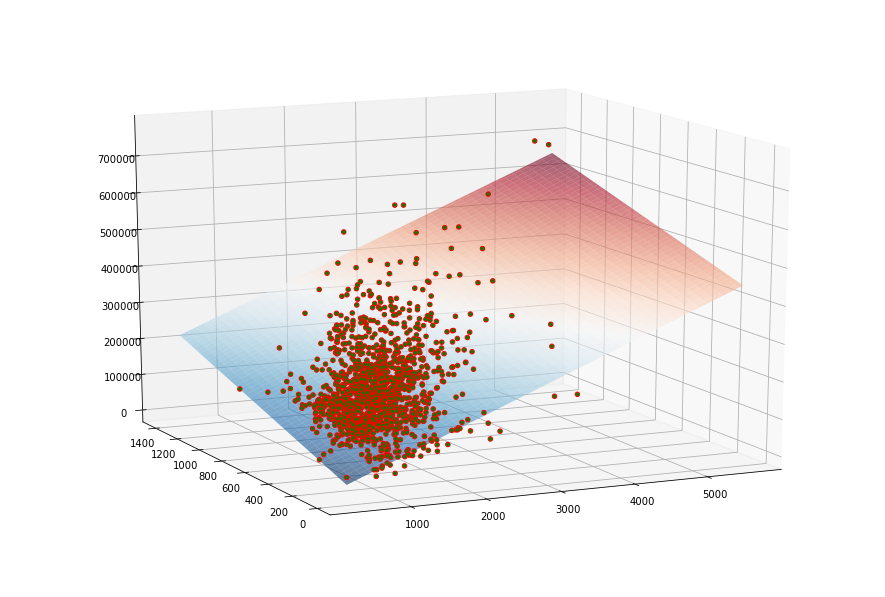

In [32]:
p1,q1=np.meshgrid(np.linspace(min(g_liv),max(g_liv),100),np.linspace(min(g_area),max(g_area),100))
r1=forecast(p1,q1)
fig=plt.figure(figsize=(12,8))
axes=Axes3D(fig,azim=-115,elev=15)
s=axes.plot_surface(p1,q1,r1,cmap=plt.cm.RdBu_r,alpha=0.6,linewidth=0)
axes.scatter(g_liv,g_area,salesprice,color='red',alpha=1.0,facecolor='green')
plt.show()